# **Analisis del conjunto de datos**

## Integrantes
- **Jonk Keyler Sanchez Pabon : 2221551**
- **Nicolas Quintero Sierra :**


**Estadistica II grupo C1**

## 1. Descripción del dataset

### Conjunto de datos
El conjunto de datos seleccionado para el proyecto fue *Electric Power Consumption* , obtenido de [kaggle/datasets/electric-power-consumption](https://www.kaggle.com/datasets/fedesoriano/electric-power-consumption) , este conjunto de datos corresponde al consumo de energía eléctica en la ciudad de *Tetouan, Morocco* durante el año del 2017 , el consumo esta ventaneado por diez minutos. En total se cuenta con 52,416 Observaciones de consumo de energía en una ventana de 10 minutos. Cada observación se describe con 9 columnas de características.Este conjunto de datos se cataloga como una serie de tiempo , ya que , son un conjunto de observaciones realizadas en un intervalo de tiempo regular y ordenadas cronologicamente.

### Objetivo
El objetivo de este proyecto es realizar un analisis exploratorio de los datos en primera instancia para revisar distribuciones y parametros de cada una de las variables y luego para identificar patrones y comportamientos en el consumo de energía eléctrica en la ciudad de Tetouan, Morocco durante el año 2017.

### Variables
Las variables que cuenta el conjunto de datos son las siguientes:
- ```Datetime```: Fecha y hora de la medición (actualmente en formato de texto).
- ```Temperature```: Temperatura en grados Celsius.
- ```Humidity```: Humedad en porcentaje.
- ```WindSpeed```: Velocidad del viento.
- ```GeneralDiffuseFlows``` 
- ```DiffuseFlows```: Flujos de radiación solar difusa.
- ```PowerConsumption_Zone1```, ```PowerConsumption_Zone2```, ```PowerConsumption_Zone3```: Consumo de energía en las tres zonas de Tetuán , Quads, Smir y Boussafou respectivamente , la unidad de consumo de energía electrica es *kWh*.

Las variables ```Temperature``` (°C), ```Humidity``` (%), ```WindSpeed``` , ```GeneralDiffuseFlows``` y ```DiffuseFlows``` representan factores meteorológicos que pueden influir en el consumo eléctrico.

- Temperatura (°C): Tiene sentido incluirla, ya que las variaciones térmicas pueden afectar la demanda energética (uso de calefacción en invierno y ventiladores o aire acondicionado en verano) , ademas , marruecos presenta un clima con veranos muy calurosos e inviernos frios.
- Humedad (%): También puede influir en la demanda energética. En climas húmedos, el uso de deshumidificadores o ventiladores puede aumentar el consumo.
- Velocidad del viento (WindSpeed): En teoría, podría afectar la sensación térmica y, en consecuencia, el consumo de calefacción o refrigeración. Sin embargo, en el contexto urbano de Tetuán, su impacto podría ser limitado.
- GeneralDiffuseFlows y DiffuseFlows (Radiación Solar Difusa): Son relevantes, ya que la radiación solar puede influir en la temperatura ambiente y en el uso de sistemas de climatización, además de ser un factor clave para la generación de energía solar.

En conclusión , Las nueve variables se denotan como importantes para el análisis de los datos, ya que, se espera que estas variables tengan una relación con el consumo de energía eléctrica en la ciudad de Tetouan, Morocco , por lo cual , ninguna de las variables sera eliminada del conjunto de datos.

## 2. Grafica de distribución de probabilidad para estas variables

Importando librerias necesarias para el analisis de los datos

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('ggplot')

In [2]:
url_data='https://drive.google.com/uc?export=download&id=1vHnWlMTq32Wqf1TB1RbwYCx15tzF1uiX'

Los datos que se encuentran en formato ```csv``` se cargaran en un DataFrame de ```pandas``` para su posterior análisis.

In [3]:
df=pd.read_csv(url_data)
df

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [16]:
bins=int(1+np.log2(df.shape[0]))

Ajustando la variable ```Datetime``` a un formato de fecha y hora como una ```timestamp``` para facilitar el analisis de los datos.

In [4]:
df['time']=pd.to_datetime(df["Datetime"], format="%m/%d/%Y %H:%M")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Datetime                52416 non-null  object        
 1   Temperature             52416 non-null  float64       
 2   Humidity                52416 non-null  float64       
 3   WindSpeed               52416 non-null  float64       
 4   GeneralDiffuseFlows     52416 non-null  float64       
 5   DiffuseFlows            52416 non-null  float64       
 6   PowerConsumption_Zone1  52416 non-null  float64       
 7   PowerConsumption_Zone2  52416 non-null  float64       
 8   PowerConsumption_Zone3  52416 non-null  float64       
 9   time                    52416 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 4.0+ MB


In [7]:
df.drop(columns=['Datetime'], inplace=True)

In [8]:
df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,time
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,2017-01-01 00:00:00
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,2017-01-01 00:10:00
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,2017-01-01 00:20:00
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,2017-01-01 00:30:00
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,2017-01-01 00:40:00


Convertir la fecha en el indice del conjunto de datos

In [9]:
df.set_index('time',inplace=True)

A continuación se calculan algunos estadísticos descriptivos para cada una de las variables del conjunto de datos.

In [14]:
df.describe()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [10]:
df['2017-01-02':'2017-01-03']

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
time,,,,,,,,
2017-01-02 00:00:00,11.01,75.8,0.076,0.033,0.163,26703.79747,18047.41641,17916.14458
2017-01-02 00:10:00,10.74,77.3,0.078,0.084,0.108,26169.11392,17507.59878,17349.39759
2017-01-02 00:20:00,10.47,78.2,0.078,0.088,0.130,25622.27848,17120.97264,16985.06024
2017-01-02 00:30:00,10.31,79.2,0.076,0.091,0.134,24972.15190,16785.41033,16586.02410
2017-01-02 00:40:00,10.63,79.3,0.079,0.037,0.152,24437.46835,16453.49544,16366.26506
...,...,...,...,...,...,...,...,...
2017-01-03 23:10:00,8.52,85.0,0.075,0.073,0.078,31686.07595,21082.06687,20593.73494
2017-01-03 23:20:00,8.60,84.4,0.074,0.048,0.104,30847.59494,20768.38906,20136.86747
2017-01-03 23:30:00,8.49,84.5,0.077,0.040,0.159,30063.79747,20250.45593,19575.90361


Una primera vista de los datos

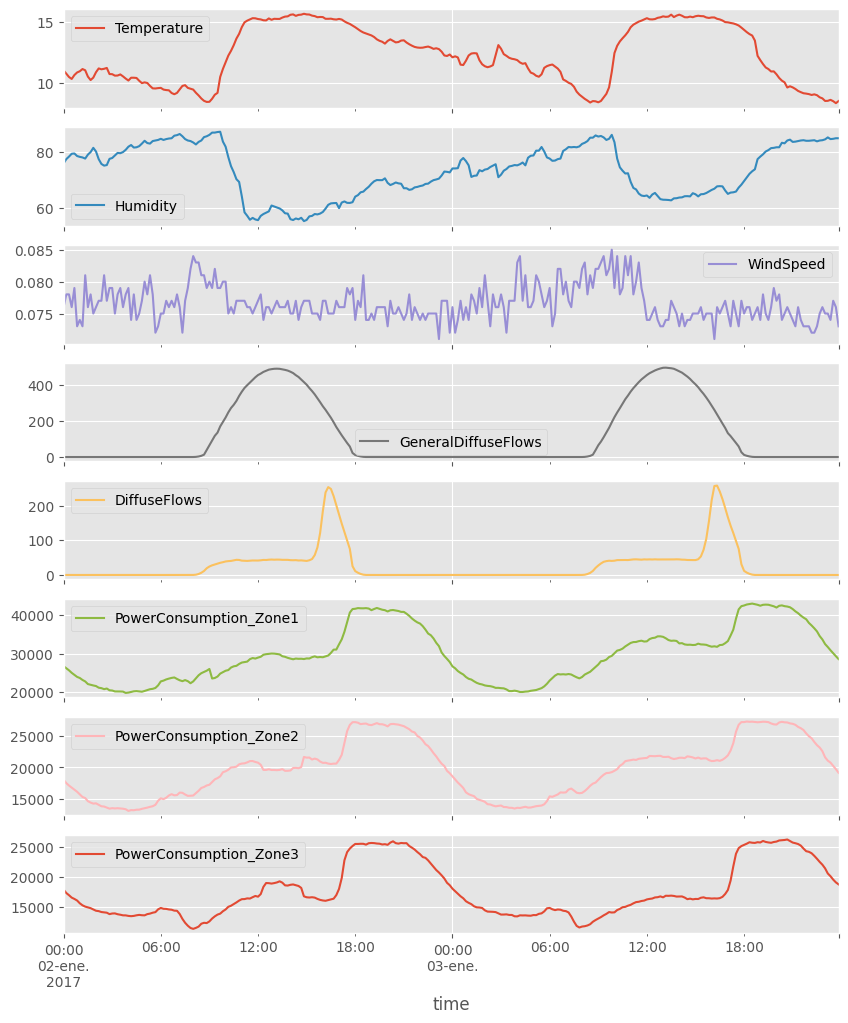

In [18]:
df['2017-01-02':'2017-01-03'].plot(subplots=True,figsize=(10,12))
plt.show()

In [88]:
def hist_box(data,bins):
    mean=data.mean()
    median=data.median()
    mode=data.mode()[0]
    std=data.std()
    fig,ax=plt.subplots(1,2,figsize=(12,6))
    sns.histplot(data,ax=ax[0],kde=True,bins=bins,color='blue')
    ax[0].axvline(mean,color='k',linestyle='dashed',linewidth=1.5,label='Mean')
    ax[0].axvline(median,color='r',linestyle='dashed',linewidth=1.5,label='Median')
    ax[0].axvline(mode,color='g',linestyle='dashed',linewidth=1.5,label='Mode')
    ax[0].text(ax[0].get_xlim()[1]*0.7,ax[0].get_ylim()[1]*0.9,rf'$\sigma$ = {std:.2f}')
    ax[0].legend()
    ax[0].set_title(f'Histogram of {data.name} and KDE')
    sns.boxplot(data,ax=ax[1],orient='v',color='red')
    ax[1].set_title(f'Boxplot of {data.name}')
    plt.show()

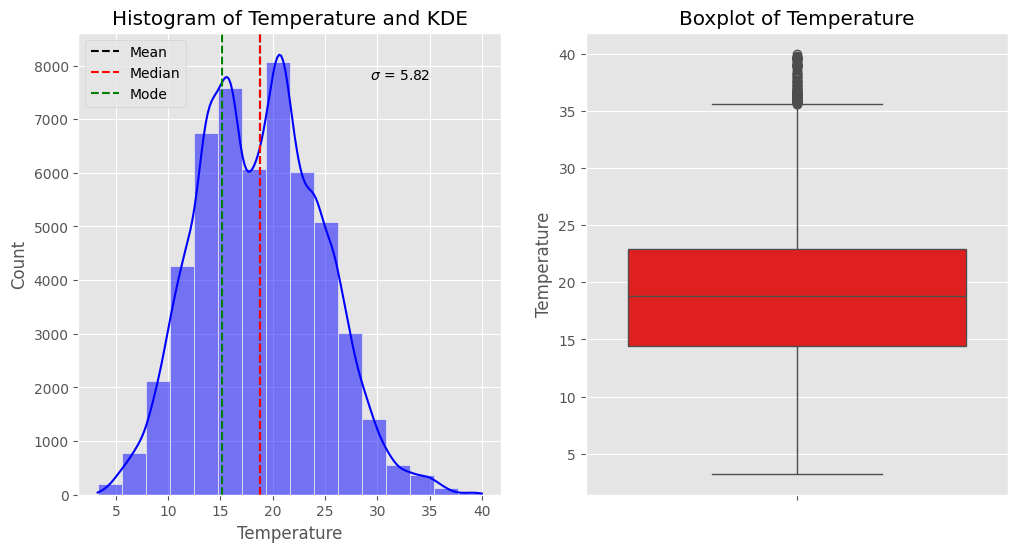

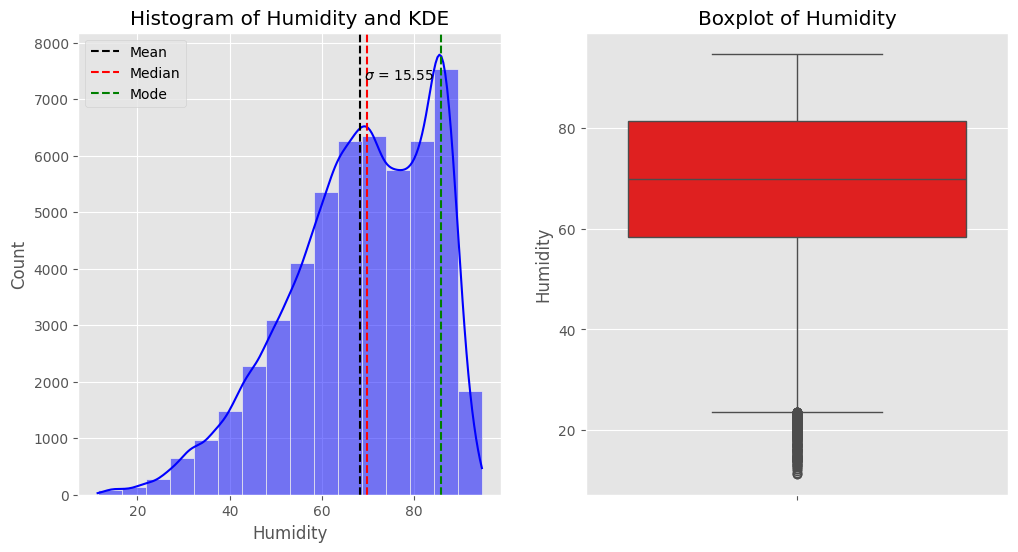

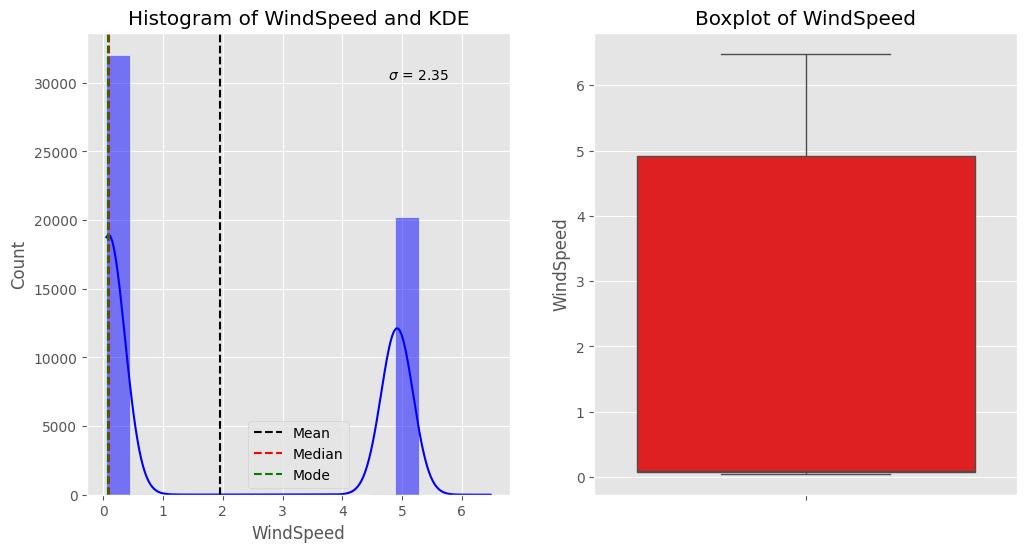

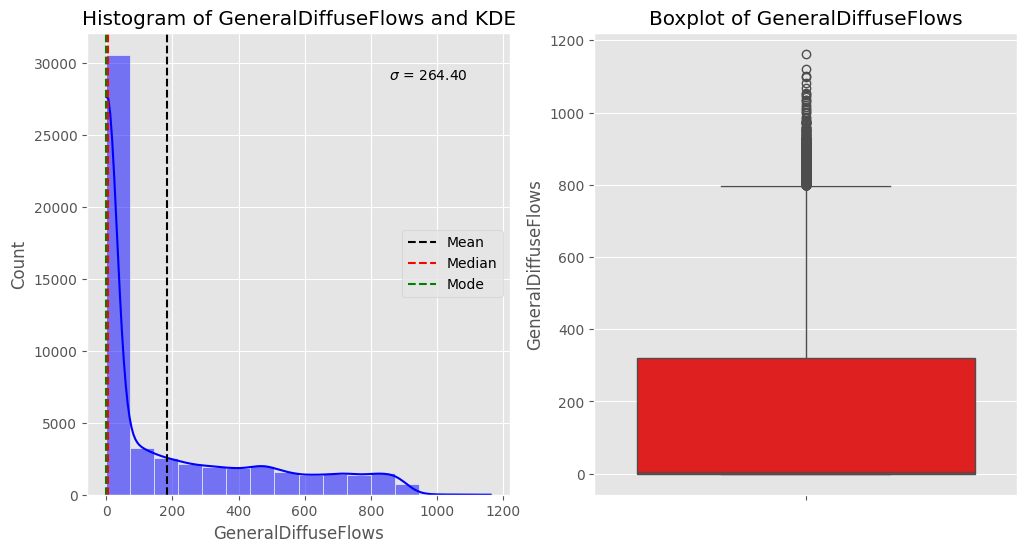

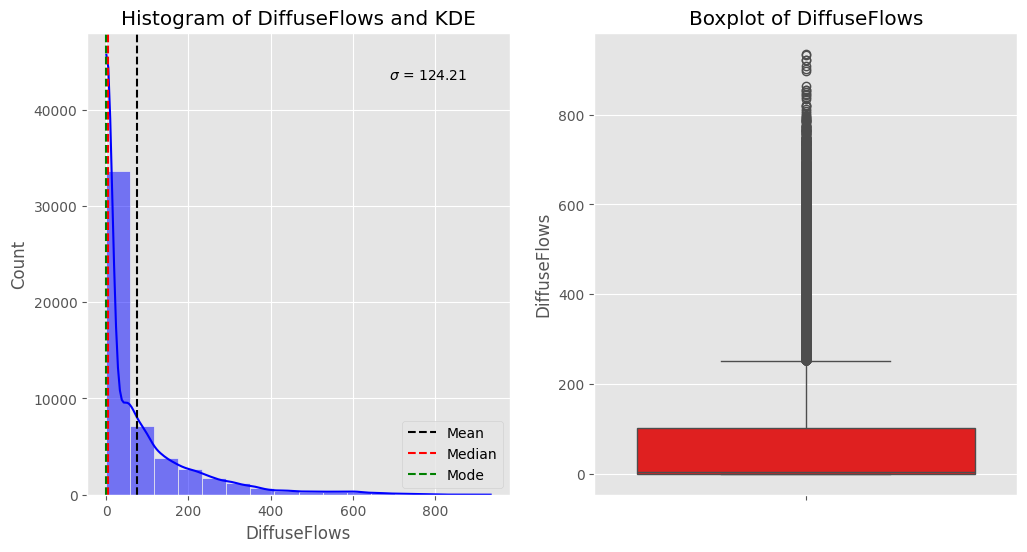

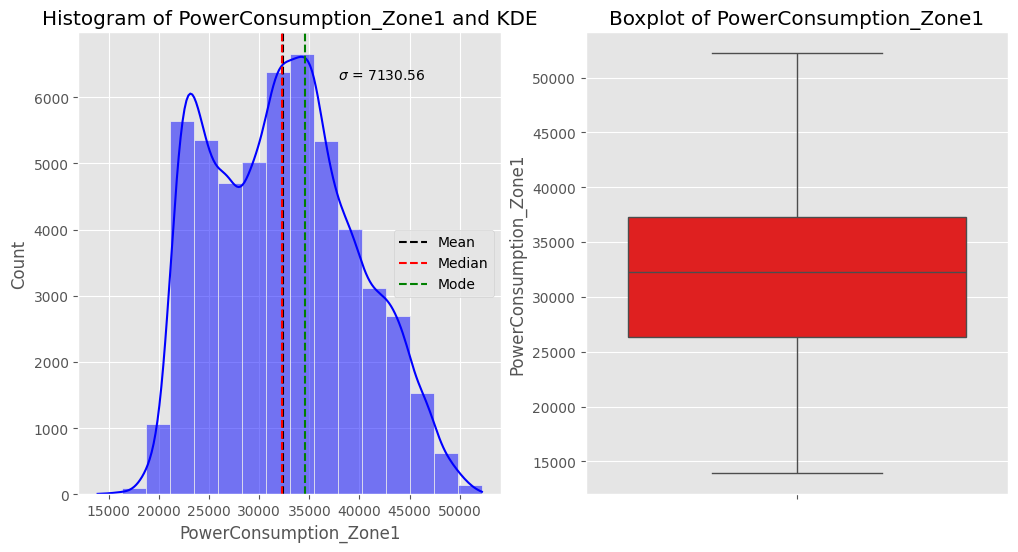

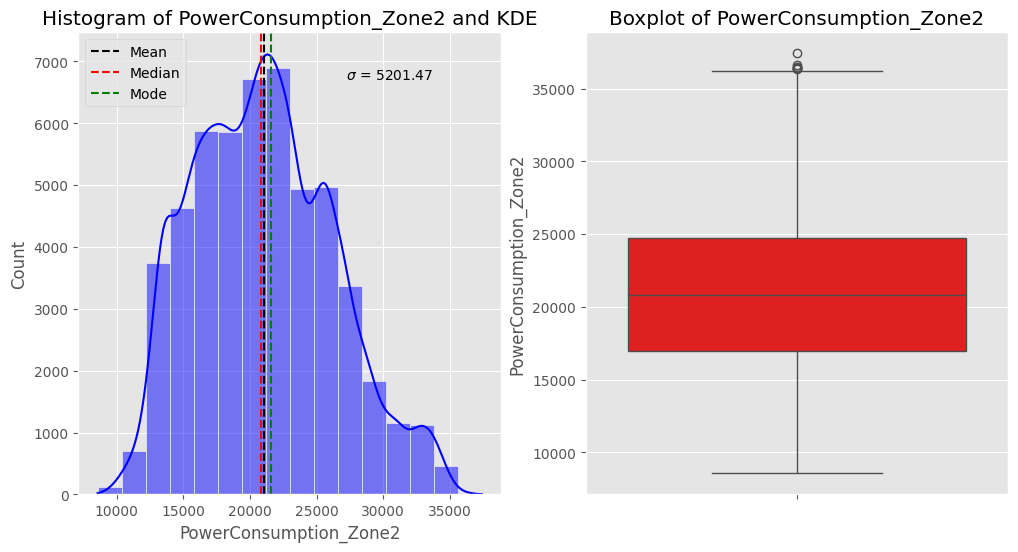

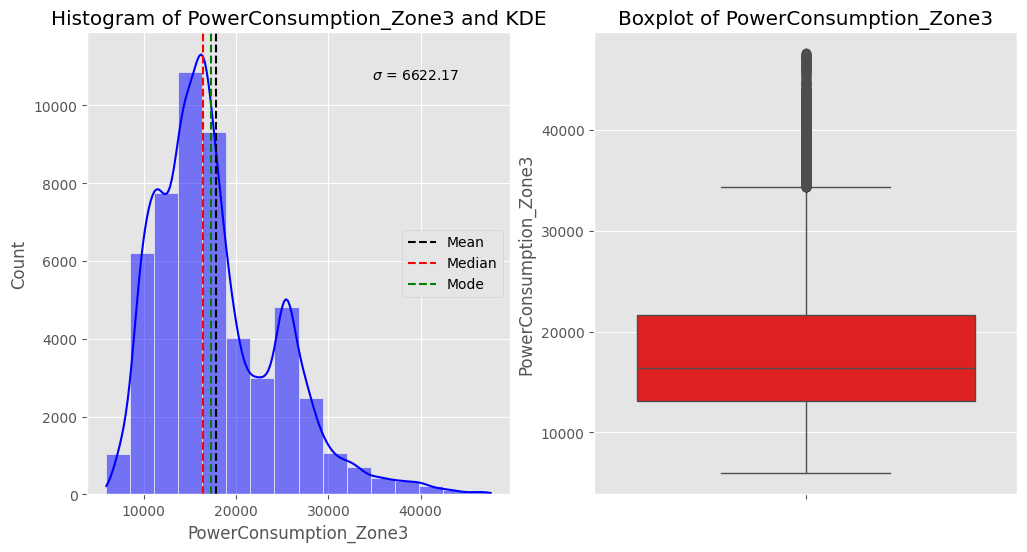

In [89]:
df.apply(lambda x: hist_box(x, bins));